In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import tensorflow as tf
print("Required Libraries are Loaded")

Required Libraries are Loaded


In [4]:
#import dataset
df = pd.read_csv('/content/Walmart.csv')
df

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106
...,...,...,...,...,...,...,...,...
6430,45,28-09-2012,713173.95,0,64.88,3.997,192.013558,8.684
6431,45,05-10-2012,733455.07,0,64.89,3.985,192.170412,8.667
6432,45,12-10-2012,734464.36,0,54.47,4.000,192.327265,8.667
6433,45,19-10-2012,718125.53,0,56.47,3.969,192.330854,8.667


In [5]:
'''
--------------------------------Holidays--------------------------------------

 Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13
 Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13
 Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13
 Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13
'''

'\n--------------------------------Holidays--------------------------------------\n\n Super Bowl: 12-Feb-10, 11-Feb-11, 10-Feb-12, 8-Feb-13\n Labour Day: 10-Sep-10, 9-Sep-11, 7-Sep-12, 6-Sep-13\n Thanksgiving: 26-Nov-10, 25-Nov-11, 23-Nov-12, 29-Nov-13\n Christmas: 31-Dec-10, 30-Dec-11, 28-Dec-12, 27-Dec-13\n'

In [6]:
df.shape

(6435, 8)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6435 entries, 0 to 6434
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         6435 non-null   int64  
 1   Date          6435 non-null   object 
 2   Weekly_Sales  6435 non-null   float64
 3   Holiday_Flag  6435 non-null   int64  
 4   Temperature   6435 non-null   float64
 5   Fuel_Price    6435 non-null   float64
 6   CPI           6435 non-null   float64
 7   Unemployment  6435 non-null   float64
dtypes: float64(5), int64(2), object(1)
memory usage: 402.3+ KB


In [8]:
#check if dataset has any null features
for feature in df.columns:
  print("{} has {} NaN values in it.".format(feature,df[feature].isna().sum()))

Store has 0 NaN values in it.
Date has 0 NaN values in it.
Weekly_Sales has 0 NaN values in it.
Holiday_Flag has 0 NaN values in it.
Temperature has 0 NaN values in it.
Fuel_Price has 0 NaN values in it.
CPI has 0 NaN values in it.
Unemployment has 0 NaN values in it.


In [9]:
for feature in df.columns:
  print(feature," ")

Store  
Date  
Weekly_Sales  
Holiday_Flag  
Temperature  
Fuel_Price  
CPI  
Unemployment  


In [10]:
df['Date'] = pd.to_datetime(df['Date'], format='%d-%m-%Y')

# Extract weekday, month, and year from 'Date'
df['weekday'] = df.Date.dt.weekday
df['month'] = df.Date.dt.month
df['year'] = df.Date.dt.year

# Drop 'Date' column
df.drop('Date', axis=1, inplace=True)

In [11]:
df.head()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,weekday,month,year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,4,2,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,4,2,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,4,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,4,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,4,3,2010


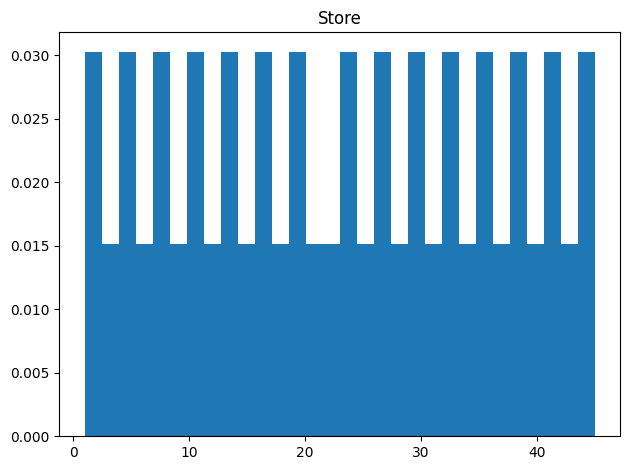

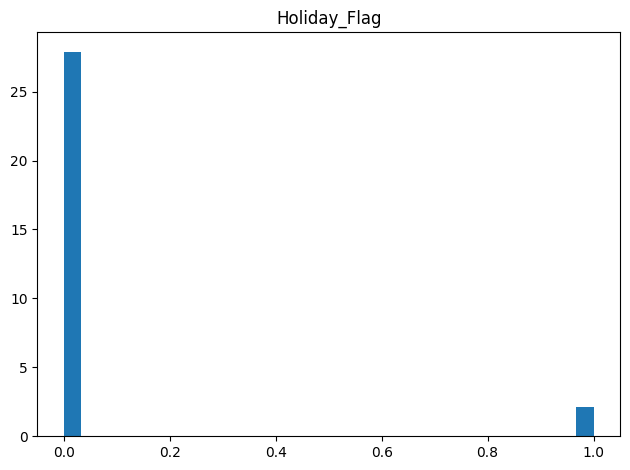

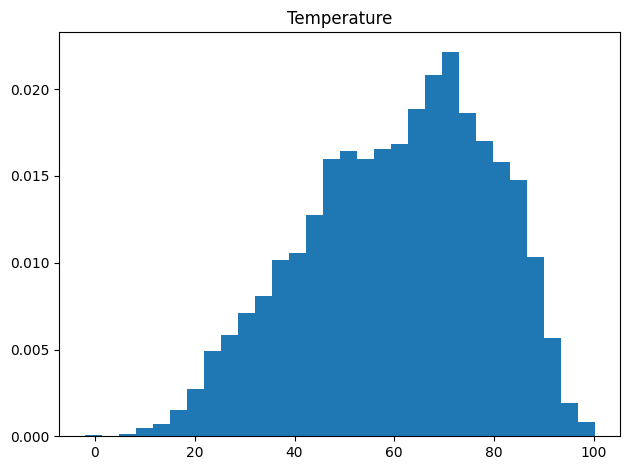

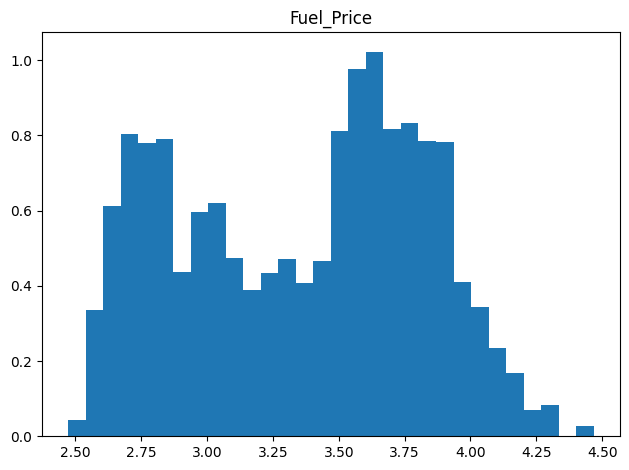

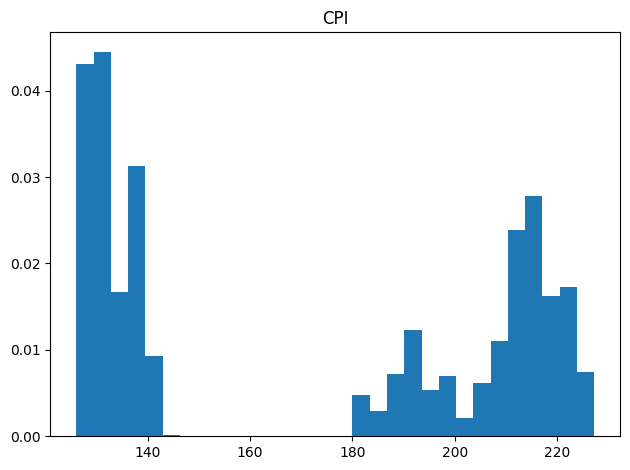

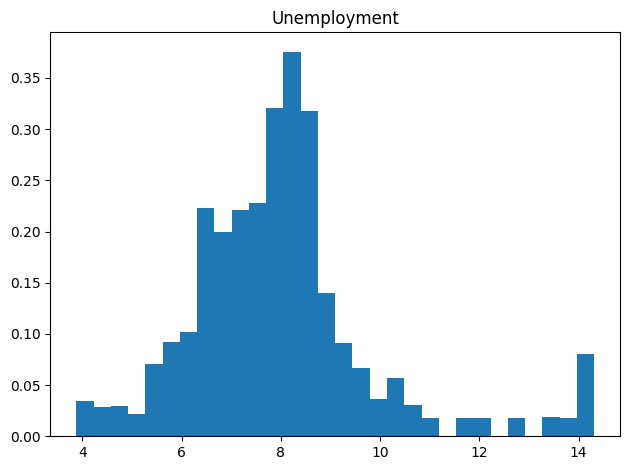

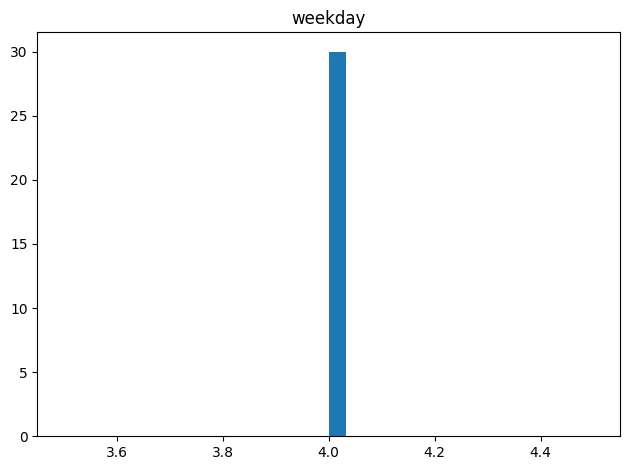

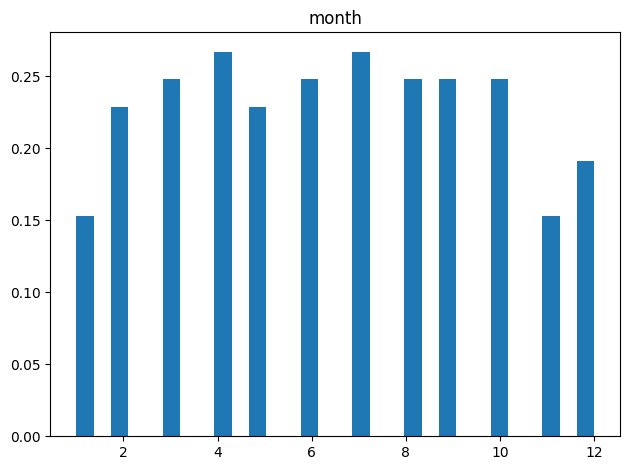

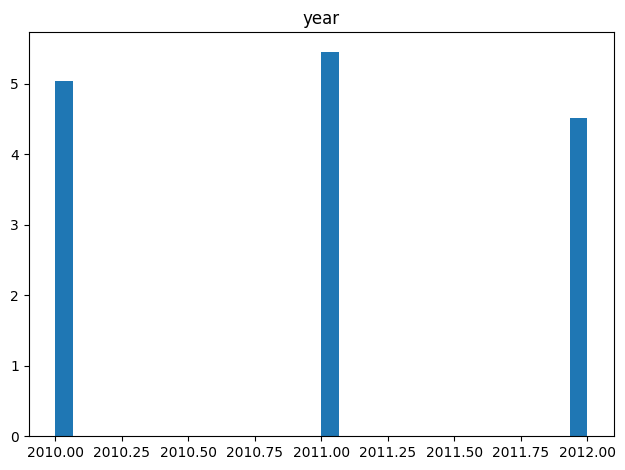

In [12]:
for feature in df.columns:
  if(feature!='Weekly_Sales'):
    data = df.copy()
    plt.hist(data[feature],bins=30,density=1)
    plt.title(feature)
    plt.tight_layout()
    plt.show()

In [14]:
len(df['weekday'].unique())

1

In [15]:
df.drop('weekday',axis=1,inplace=True)

In [16]:
df

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment,month,year
0,1,1643690.90,0,42.31,2.572,211.096358,8.106,2,2010
1,1,1641957.44,1,38.51,2.548,211.242170,8.106,2,2010
2,1,1611968.17,0,39.93,2.514,211.289143,8.106,2,2010
3,1,1409727.59,0,46.63,2.561,211.319643,8.106,2,2010
4,1,1554806.68,0,46.50,2.625,211.350143,8.106,3,2010
...,...,...,...,...,...,...,...,...,...
6430,45,713173.95,0,64.88,3.997,192.013558,8.684,9,2012
6431,45,733455.07,0,64.89,3.985,192.170412,8.667,10,2012
6432,45,734464.36,0,54.47,4.000,192.327265,8.667,10,2012
6433,45,718125.53,0,56.47,3.969,192.330854,8.667,10,2012


In [17]:
#now removing the data imbalance from the Holiday_Flag
from imblearn.combine import SMOTETomek
smk = SMOTETomek(random_state=42)

X = df.drop('Holiday_Flag',axis=1)
y = df['Holiday_Flag']

X_resampled,y_resampled = smk.fit_resample(X,y)
# it will print no. of occourences of each output
from collections import Counter
print("Original Dataset shape {}".format(Counter(y)))
print("Resampled Dataset shape {}".format(Counter(y_resampled)))

Original Dataset shape Counter({0: 5985, 1: 450})
Resampled Dataset shape Counter({0: 4589, 1: 4589})


In [18]:
X_resampled

,Store,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,month,year
0,1,1.409728e+06,46.630000,2.561000,211.319643,8.106000,2,2010
1,1,1.554807e+06,46.500000,2.625000,211.350143,8.106000,3,2010
2,1,1.439542e+06,57.790000,2.667000,211.380643,8.106000,3,2010
3,1,1.404430e+06,51.450000,2.732000,211.018042,8.106000,3,2010
4,1,1.594968e+06,62.270000,2.719000,210.820450,7.808000,4,2010
...,...,...,...,...,...,...,...,...
9173,9,4.726457e+05,35.702063,2.975328,205.987407,6.939734,2,2010
9174,18,4.610648e+05,53.364874,2.852124,213.388675,7.260360,11,2010
9175,17,3.509802e+05,58.752016,3.279336,217.882176,7.062648,10,2011
9176,17,1.196201e+06,45.515364,2.834322,128.086607,7.599759,6,2010


In [19]:
df = pd.concat([X_resampled,y_resampled],axis=1)
df

,Store,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,month,year,Holiday_Flag
0,1,1.409728e+06,46.630000,2.561000,211.319643,8.106000,2,2010,0
1,1,1.554807e+06,46.500000,2.625000,211.350143,8.106000,3,2010,0
2,1,1.439542e+06,57.790000,2.667000,211.380643,8.106000,3,2010,0
3,1,1.404430e+06,51.450000,2.732000,211.018042,8.106000,3,2010,0
4,1,1.594968e+06,62.270000,2.719000,210.820450,7.808000,4,2010,0
...,...,...,...,...,...,...,...,...,...
9173,9,4.726457e+05,35.702063,2.975328,205.987407,6.939734,2,2010,1
9174,18,4.610648e+05,53.364874,2.852124,213.388675,7.260360,11,2010,1
9175,17,3.509802e+05,58.752016,3.279336,217.882176,7.062648,10,2011,1
9176,17,1.196201e+06,45.515364,2.834322,128.086607,7.599759,6,2010,1


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9178 entries, 0 to 9177
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         9178 non-null   int64  
 1   Weekly_Sales  9178 non-null   float64
 2   Temperature   9178 non-null   float64
 3   Fuel_Price    9178 non-null   float64
 4   CPI           9178 non-null   float64
 5   Unemployment  9178 non-null   float64
 6   month         9178 non-null   int64  
 7   year          9178 non-null   int64  
 8   Holiday_Flag  9178 non-null   int64  
dtypes: float64(5), int64(4)
memory usage: 645.5 KB


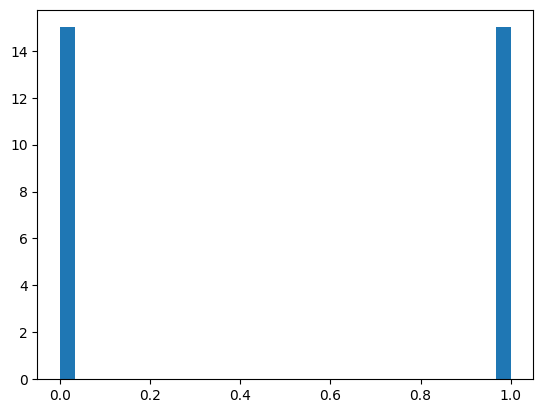

In [21]:
plt.hist(df['Holiday_Flag'],bins=30,density=1)
plt.show()

In [22]:
df.corr()

,Store,Weekly_Sales,Temperature,Fuel_Price,CPI,Unemployment,month,year,Holiday_Flag
Store,1.000000,-0.362334,-0.006696,0.059497,-0.204619,0.218983,-0.008341,0.008560,-0.017993
Weekly_Sales,-0.362334,1.000000,-0.094375,-0.002648,-0.082340,-0.101651,0.110732,-0.064932,0.101584
Temperature,-0.006696,-0.094375,1.000000,0.236945,0.173767,0.088398,0.202586,0.185662,-0.323329
Fuel_Price,0.059497,-0.002648,0.236945,1.000000,-0.180822,-0.025442,-0.015865,0.746156,-0.179113
CPI,-0.204619,-0.082340,0.173767,-0.180822,1.000000,-0.297352,0.000879,0.075283,-0.007397
Unemployment,0.218983,-0.101651,0.088398,-0.025442,-0.297352,1.000000,-0.022735,-0.203886,0.015237
month,-0.008341,0.110732,0.202586,-0.015865,0.000879,-0.022735,1.000000,-0.225434,0.158018
year,0.008560,-0.064932,0.185662,0.746156,0.075283,-0.203886,-0.225434,1.000000,-0.315359
Holiday_Flag,-0.017993,0.101584,-0.323329,-0.179113,-0.007397,0.015237,0.158018,-0.315359,1.000000


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9178 entries, 0 to 9177
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         9178 non-null   int64  
 1   Weekly_Sales  9178 non-null   float64
 2   Temperature   9178 non-null   float64
 3   Fuel_Price    9178 non-null   float64
 4   CPI           9178 non-null   float64
 5   Unemployment  9178 non-null   float64
 6   month         9178 non-null   int64  
 7   year          9178 non-null   int64  
 8   Holiday_Flag  9178 non-null   int64  
dtypes: float64(5), int64(4)
memory usage: 645.5 KB


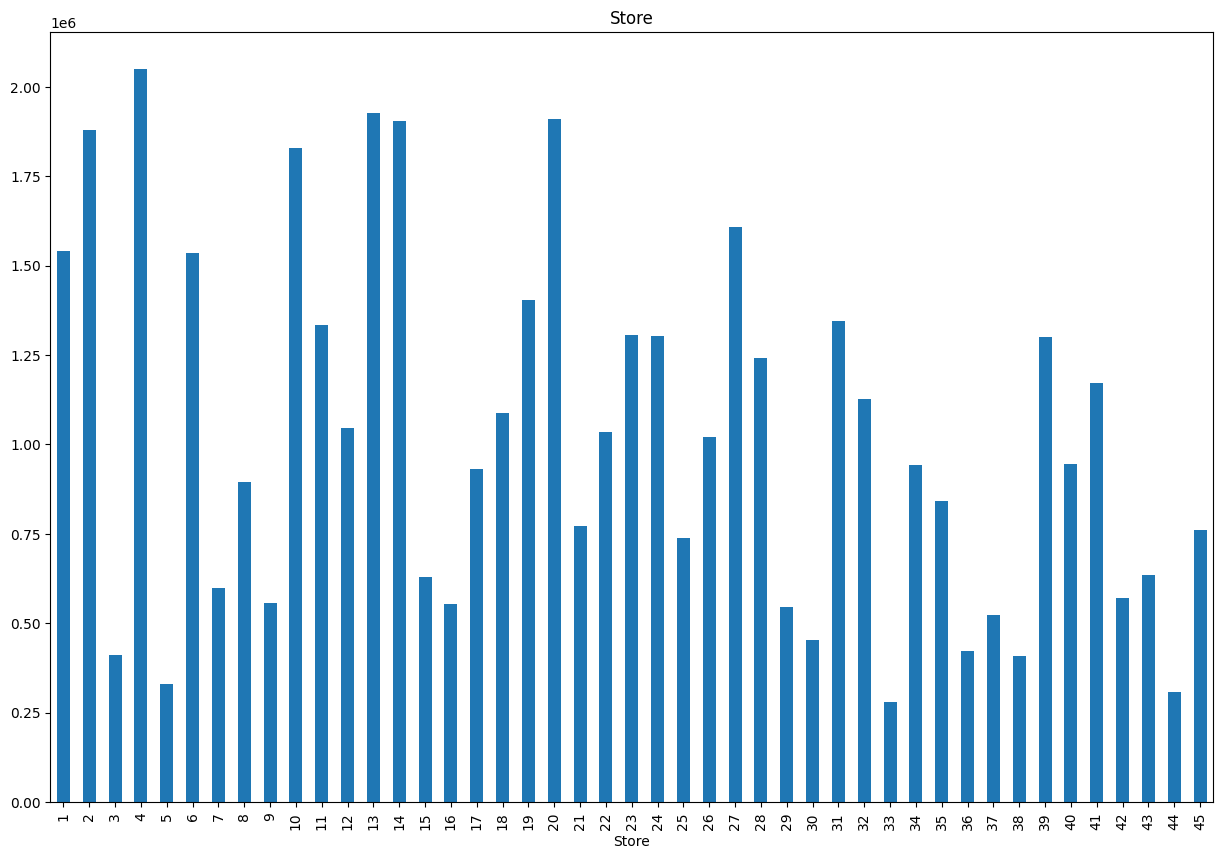

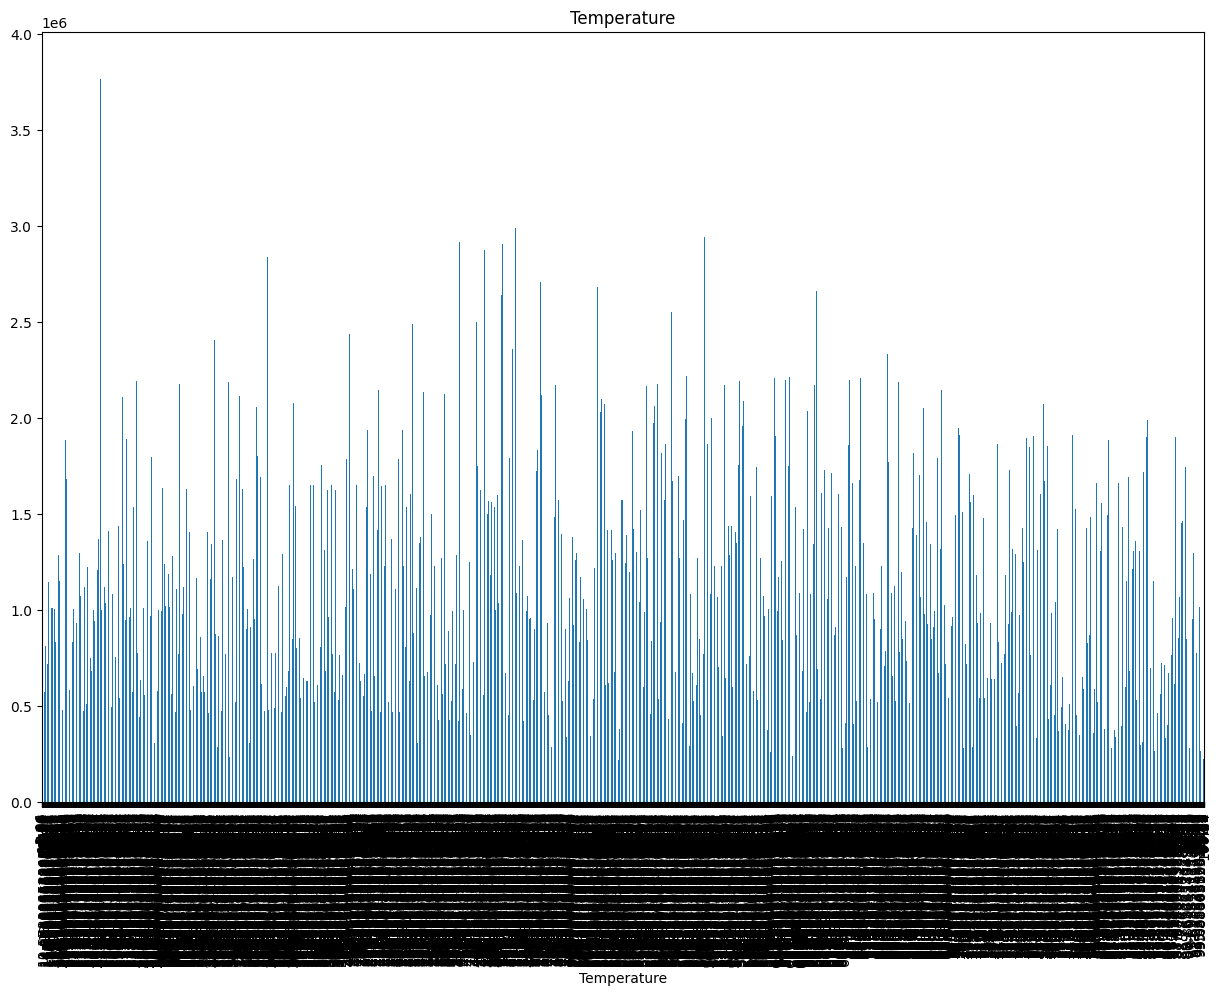

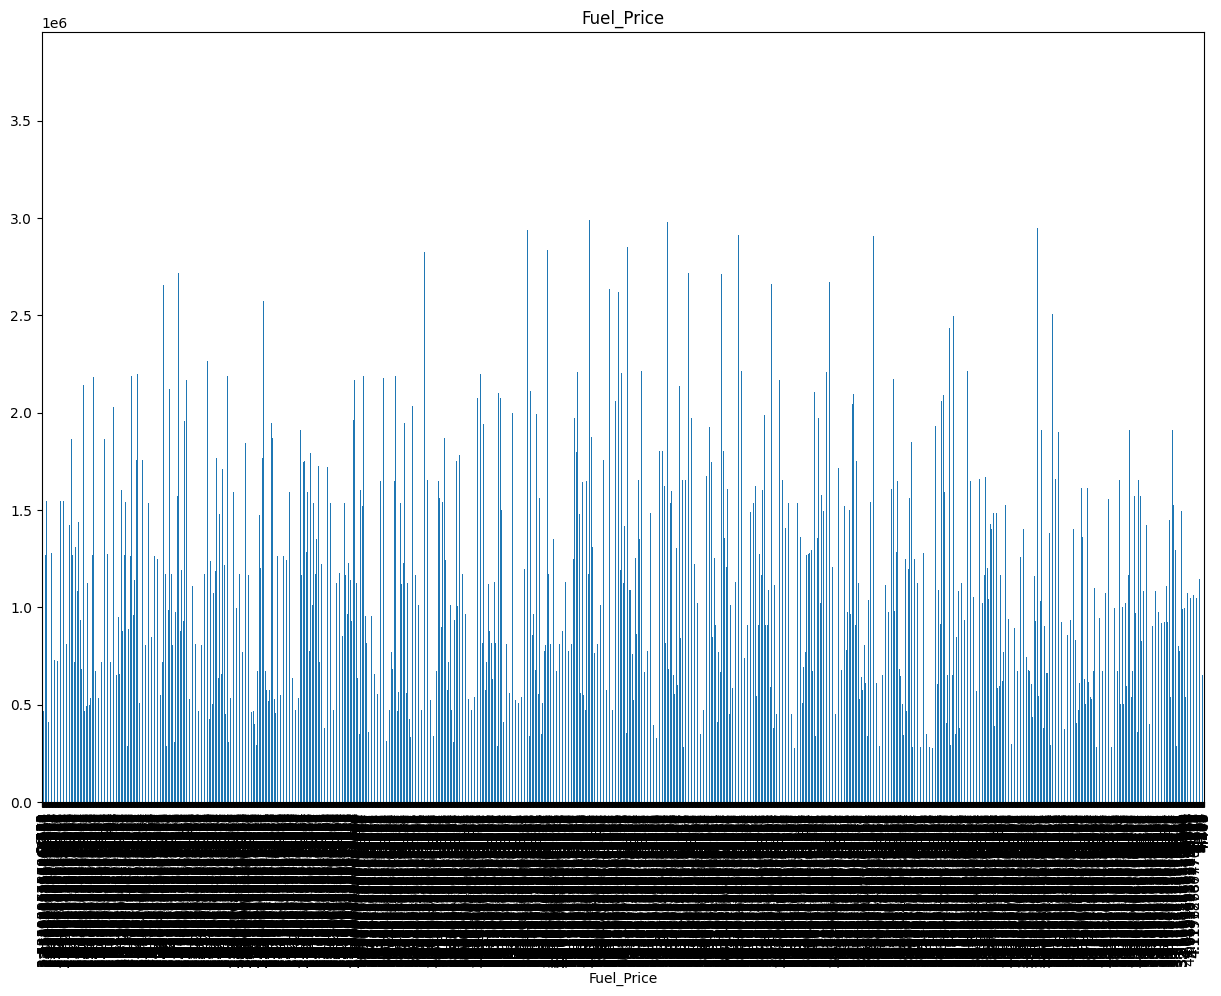

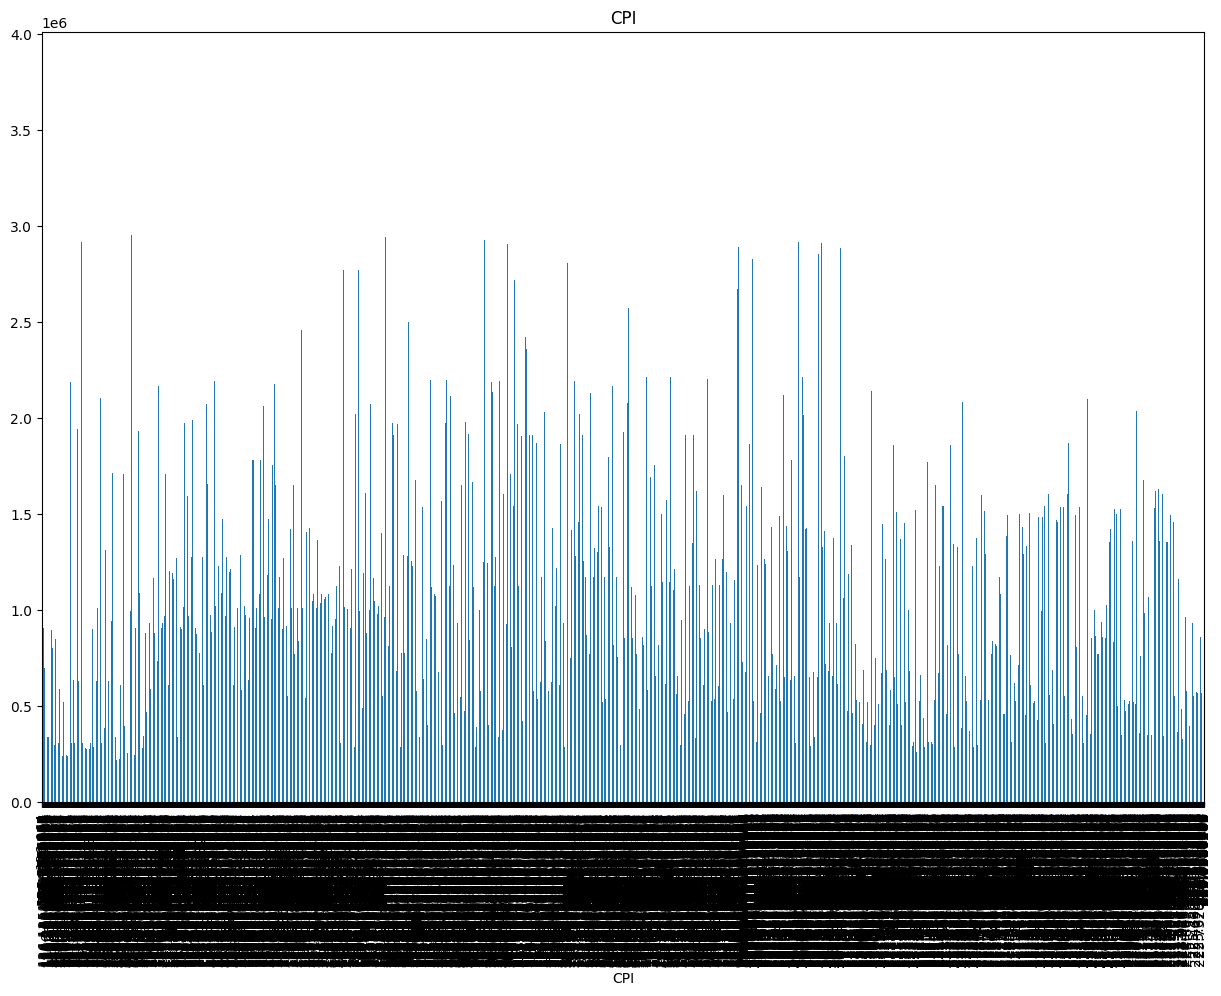

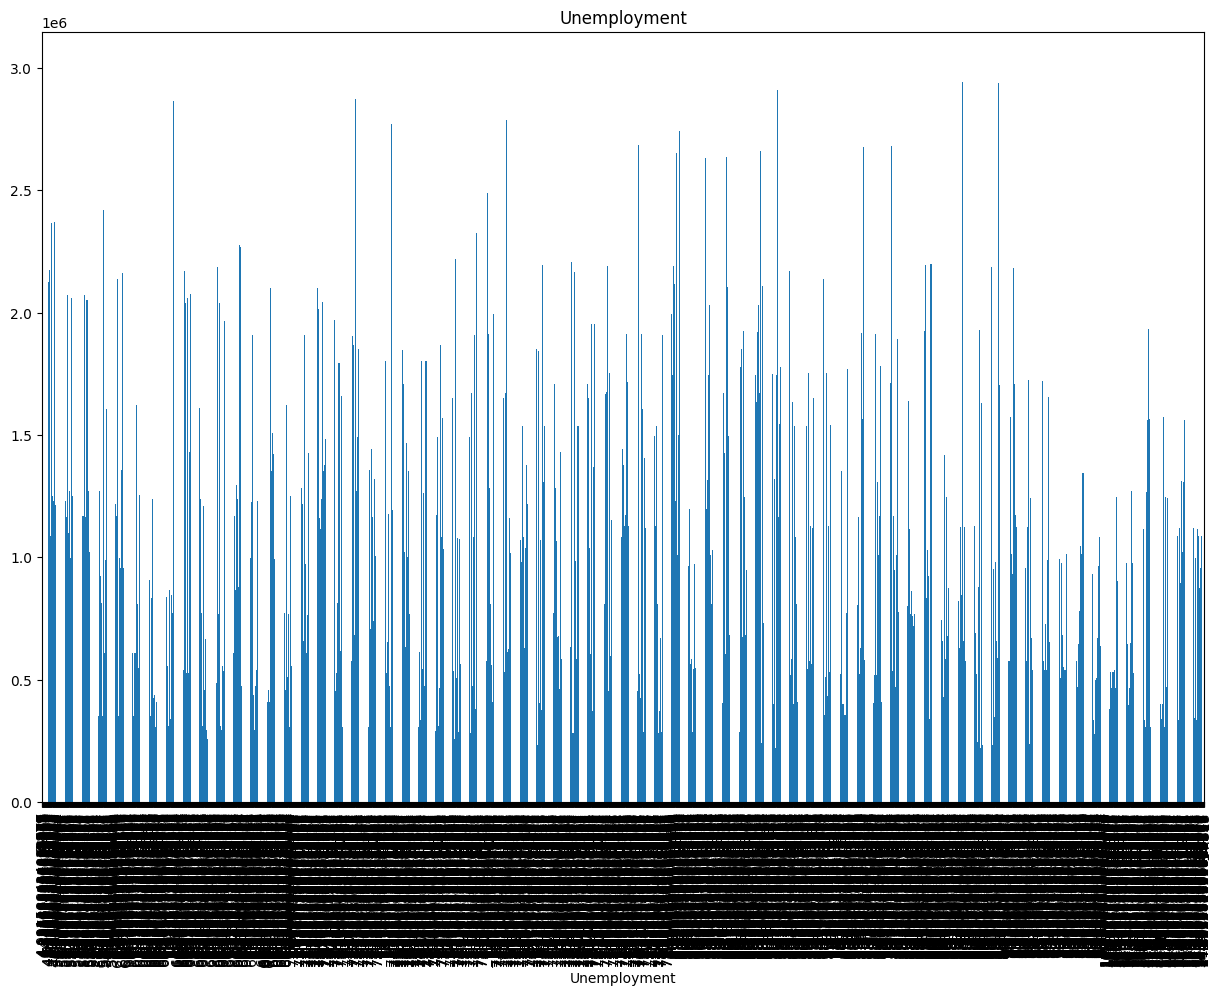

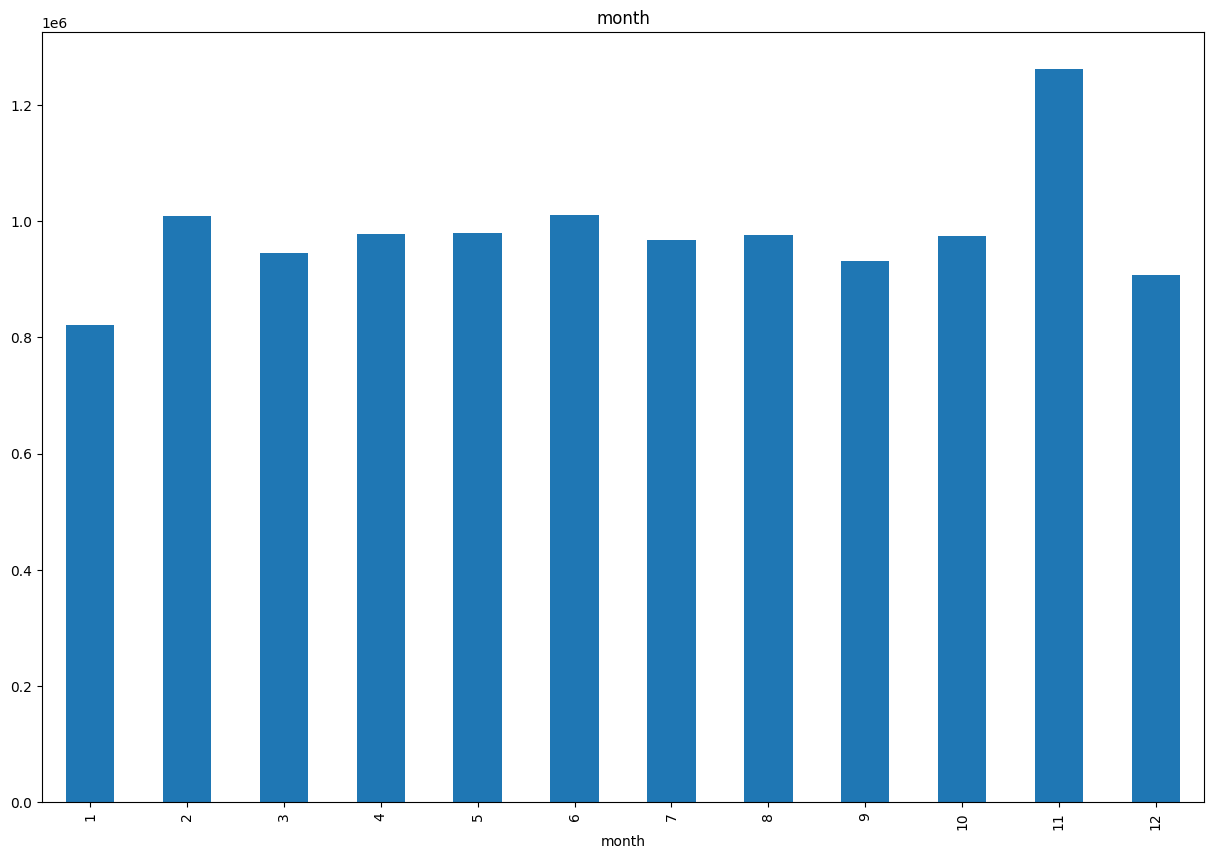

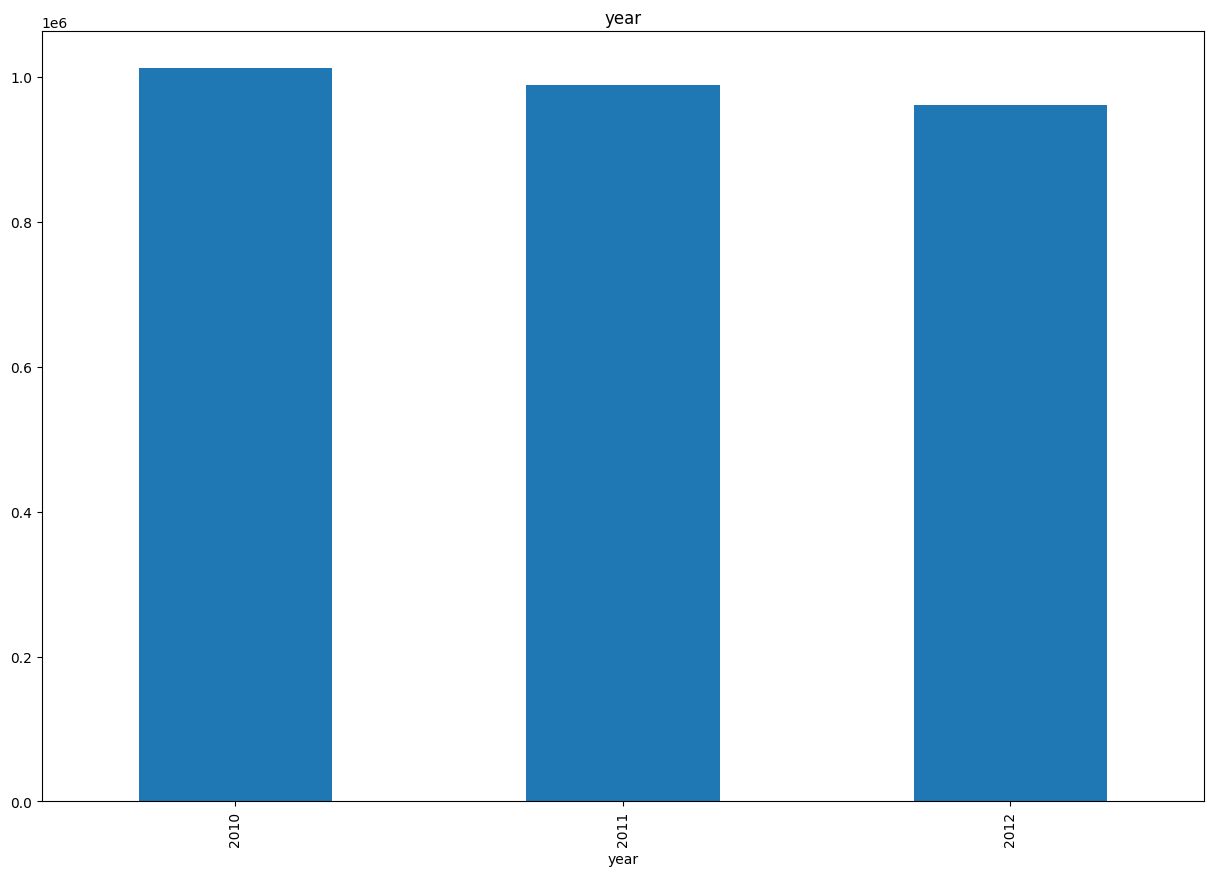

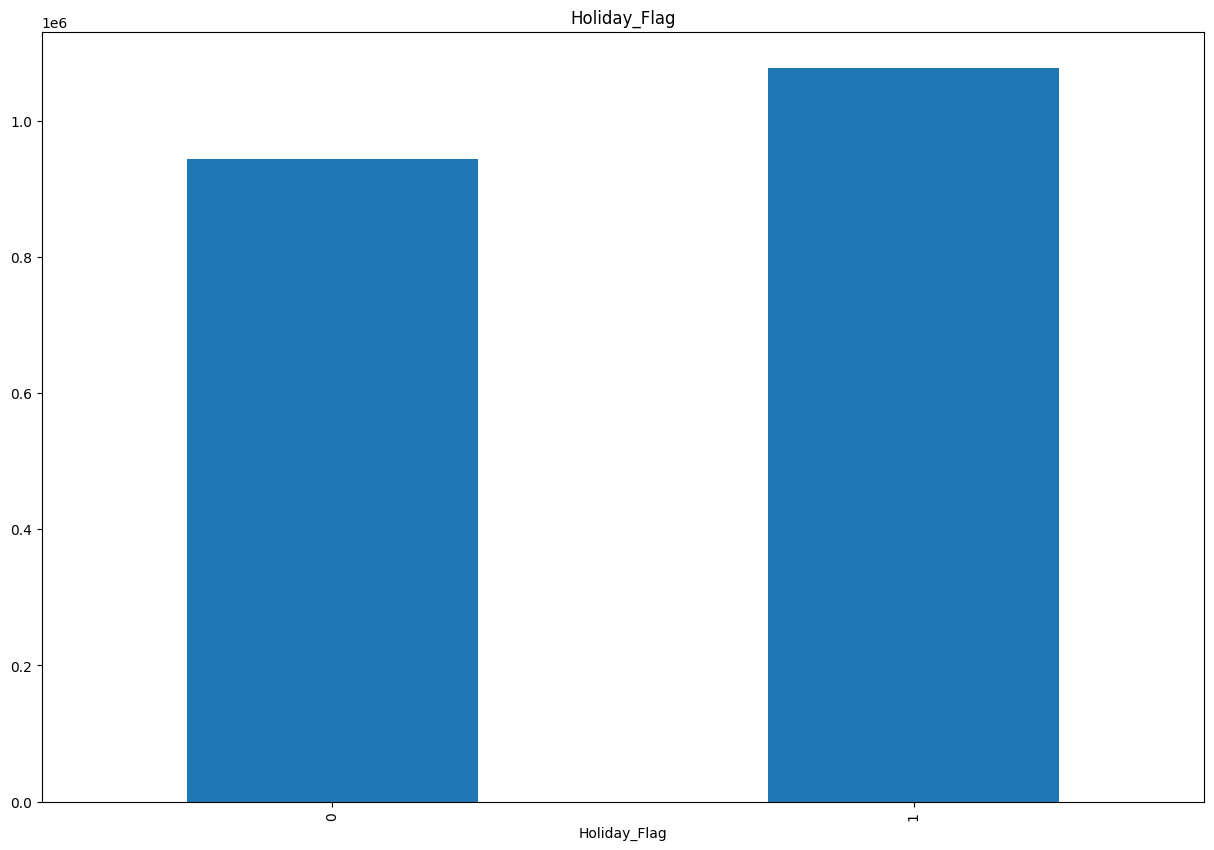

In [24]:
for feature in df.columns:
  if feature!='Weekly_Sales':
    plt.figure(figsize=(15,10))
    df.groupby(feature)['Weekly_Sales'].median().plot.bar()
    plt.title(feature)
    plt.show()

In [25]:
!pip install sweetviz
import sweetviz as sv
# analyzing the dataset
report = sv.analyze([df, 'Train'], target_feat='Weekly_Sales')

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 37.1 MB/s eta 0:00:00


                                             |          | [  0%]   00:00 -> (? left)

In [26]:
# show the report in a form of an HTML file
report.show_html('Report.html')

Report Report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [27]:
#let's normalize and standardize the data
def standardizeData(features):
  from sklearn.preprocessing import MinMaxScaler
  scalar = MinMaxScaler()
  scalar.fit(features)
  scalar.transform(features)
  data = pd.concat([pd.DataFrame(scalar.transform(features), columns=features.columns)], axis=1)

  return data

In [28]:
#independent and dependent features
X = df.drop('Weekly_Sales',axis=1)
y = df['Weekly_Sales']

In [29]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [30]:
X_train

,Store,Temperature,Fuel_Price,CPI,Unemployment,month,year,Holiday_Flag
5899,21,51.931771,3.257878,207.375562,7.042841,11,2011,1
3064,29,36.040000,3.638000,134.068258,9.966000,4,2011,0
2223,21,71.640000,3.285000,216.695831,7.441000,10,2011,0
100,1,77.120000,3.256000,221.924158,6.908000,7,2012,0
6351,22,75.447591,3.494269,213.270755,7.928291,8,2010,1
...,...,...,...,...,...,...,...,...
5734,31,25.805261,2.961903,128.870630,9.879697,2,2010,1
5191,34,66.289080,3.173665,216.694271,7.627785,11,2010,1
5390,5,47.396656,3.297632,220.558532,6.084995,5,2011,1
860,9,66.070000,2.780000,213.899046,6.384000,4,2010,0


In [31]:
y_train

5899    1.218502e+06
3064    4.756153e+05
2223    6.634525e+05
100     1.527014e+06
6351    6.541903e+05
            ...     
5734    1.015663e+06
5191    2.329951e+06
5390    3.493930e+05
860     4.917234e+05
7270    1.264044e+06
Name: Weekly_Sales, Length: 6883, dtype: float64

In [32]:
len(df)

9178

In [33]:
len(X_train),len(X_test),len(y_train),len(y_test)

(6883, 2295, 6883, 2295)

In [34]:
X_train.shape,y_train.shape

((6883, 8), (6883,))

In [35]:
import tensorflow as tf

class EpochFinderCallback(tf.keras.callbacks.Callback):
    def __init__(self, target_accuracy):
        super(EpochFinderCallback, self).__init__()
        self.target_accuracy = target_accuracy

    def on_epoch_end(self, epoch, logs=None):
        current_accuracy = logs.get('accuracy')  # Replace with the actual metric used for accuracy
        if current_accuracy is not None and current_accuracy >= self.target_accuracy:
            print(f"\nTarget accuracy of {self.target_accuracy} reached at epoch {epoch + 1}!")
            self.model.stop_training = True  # Stop training once the target accuracy is reached


In [36]:
#set random seed
tf.random.set_seed(42)

#create a model
salesForeCast = tf.keras.Sequential([
    tf.keras.Input(shape=(8,)),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1)
])

#compile the model
salesForeCast.compile(loss=tf.keras.losses.mae,
                      optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                      metrics=['mae'])

# Specify your target accuracy
target_accuracy = 0.90

# Create and use the callback during training
epoch_finder_callback = EpochFinderCallback(target_accuracy)
history = salesForeCast.fit(X_train,y_train, epochs=500, callbacks=[epoch_finder_callback])

Epoch 1/500
216/216 [==============================] - 2s 3ms/step - loss: 539110.1250 - mae: 539110.1250
Epoch 2/500
216/216 [==============================] - 1s 2ms/step - loss: 485257.1562 - mae: 485257.1562
Epoch 3/500
216/216 [==============================] - 1s 2ms/step - loss: 472656.6250 - mae: 472656.6250
Epoch 4/500
216/216 [==============================] - 1s 5ms/step - loss: 460885.2500 - mae: 460885.2500
Epoch 5/500
216/216 [==============================] - 1s 4ms/step - loss: 450359.0312 - mae: 450359.0312
Epoch 6/500
216/216 [==============================] - 1s 4ms/step - loss: 441239.5625 - mae: 441239.5625
Epoch 7/500
216/216 [==============================] - 1s 3ms/step - loss: 440738.5625 - mae: 440738.5625
Epoch 8/500
216/216 [==============================] - 0s 2ms/step - loss: 441034.0625 - mae: 441034.0625
Epoch 9/500
216/216 [==============================] - 0s 2ms/step - loss: 436861.1250 - mae: 436861.1250
Epoch 10/500
216/216 [========================

In [37]:
y_train.mean()

1083330.8904070088

In [38]:
X_train = standardizeData(X_train)
X_test = standardizeData(X_test)

In [39]:
#set random seed
tf.random.set_seed(42)

#create a model
salesForeCast_2 = tf.keras.Sequential([
    tf.keras.Input(shape=(8,)),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(100,activation="relu"),
    tf.keras.layers.Dense(1)
])

#compile the model
salesForeCast_2.compile(loss=tf.keras.losses.mae,
                      optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                      metrics=['mae'])

# Specify your target accuracy
target_accuracy = 0.90

# Create and use the callback during training
epoch_finder_callback = EpochFinderCallback(target_accuracy)
history = salesForeCast_2.fit(X_train,y_train, epochs=500, callbacks=[epoch_finder_callback])

Epoch 1/500
216/216 [==============================] - 2s 3ms/step - loss: 661620.9375 - mae: 661620.9375
Epoch 2/500
216/216 [==============================] - 0s 2ms/step - loss: 497410.5625 - mae: 497410.5625
Epoch 3/500
216/216 [==============================] - 0s 2ms/step - loss: 475829.5000 - mae: 475829.5000
Epoch 4/500
216/216 [==============================] - 0s 2ms/step - loss: 456951.1250 - mae: 456951.1250
Epoch 5/500
216/216 [==============================] - 1s 3ms/step - loss: 445943.8438 - mae: 445943.8438
Epoch 6/500
216/216 [==============================] - 0s 2ms/step - loss: 438876.0625 - mae: 438876.0625
Epoch 7/500
216/216 [==============================] - 0s 2ms/step - loss: 433915.8438 - mae: 433915.8438
Epoch 8/500
216/216 [==============================] - 0s 2ms/step - loss: 430079.1562 - mae: 430079.1562
Epoch 9/500
216/216 [==============================] - 1s 3ms/step - loss: 425445.1875 - mae: 425445.1875
Epoch 10/500
216/216 [========================

In [40]:
y_pred = salesForeCast_2.predict(X_test)

72/72 [==============================] - 0s 2ms/step


In [41]:
y_test.dtype, y_pred.dtype

(dtype('float64'), dtype('float32'))

In [42]:
y_test.shape, y_pred.shape

((2295,), (2295, 1))

In [43]:
from sklearn.metrics import mean_absolute_error
score = mean_absolute_error(y_test, tf.squeeze(y_pred))
print("The Mean Absolute Error of our Model is {}".format(round(score, 2)))

The Mean Absolute Error of our Model is 263745.13


In [44]:
y_test.median(),y_test.mean()

(995194.6146873716, 1084082.8578494224)

In [45]:
np.median(tf.squeeze(y_pred).numpy()), np.mean(tf.squeeze(y_pred).numpy())

(960262.25, 1081461.4)